# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
colours = pd.read_csv("colors.csv")

In [ ]:
colours["name"].nunique() # nunique returns number of unique values

In [ ]:
colours["name"].unique() # unique returns list of all the unique values

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [ ]:
colours.groupby("is_trans").count()

In [ ]:
colours.is_trans.value_counts()

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [22]:
sets = pd.read_csv("sets.csv")

In [ ]:
sets.head()

In [ ]:
sets.tail()

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [ ]:
sets["year"].min()

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
sets[sets["year"]==1949]

**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [ ]:
sets.sort_values("num_parts", ascending=False).head()

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [ ]:
sets.groupby(sets.year).count()

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

In [4]:
sets_by_year = sets.groupby("year").count()
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


In [ ]:
plt.xlim(1949,2018)
plt.plot(sets_by_year.index, sets_by_year.set_num)

In [ ]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2]) # as data is not complete from year 2018

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [5]:
themes_by_year = sets.groupby("year").agg({"theme_id":pd.Series.nunique})
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [8]:
themes_by_year.rename(columns = {"theme_id":"No. of Columns"}, inplace=True)
themes_by_year.head()

,No. of Columns
year,
1949,2
1950,1
1953,2
1954,2
1955,4


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

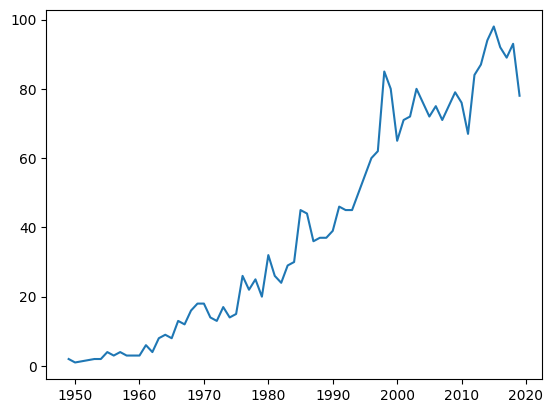

In [9]:
plt.plot(themes_by_year.index[:-2], themes_by_year["No. of Columns"][:-2])

### Line Charts with Two Seperate Axes

In [ ]:
ax1 = plt.gca() # get the axis
ax2 = ax1.twinx() # Share the same x-axis

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
ax2.plot(themes_by_year.index[:-2], themes_by_year["No. of Columns"][:-2])

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [14]:
parts_per_set = sets.groupby("year").agg({"num_parts":pd.Series.mean})

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

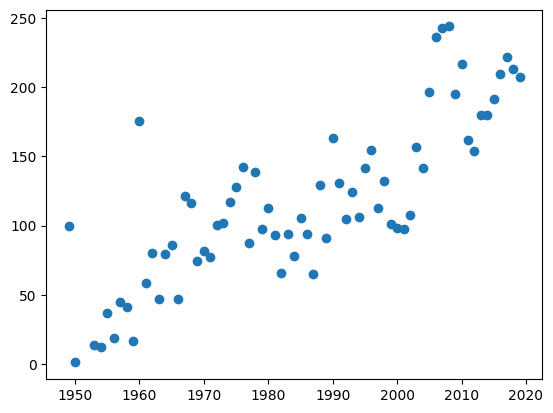

In [16]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [ ]:
set_theme_count = sets["theme_id"].value_counts() # to count the number of duplicate occurences
set_theme_count.head()

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [37]:
themes = pd.read_csv("themes.csv")

In [ ]:
check=themes.groupby("name").agg({"parent_id":pd.Series.count})
check[check.index == "Star Wars"]


In [ ]:
themes[themes.name=="Star Wars"]

In [ ]:
sets[sets.theme_id==18]

### Merging (i.e., Combining) DataFrames based on a Key


In [63]:
set_theme_coun = pd.DataFrame({'id': set_theme_count.index,
                                'set_count': set_theme_count.values})
set_theme_coun.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [67]:
merged_df = pd.merge(set_theme_coun, themes, on="id")
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


In [ ]:
plt.figure(figsize=(26,10))
plt.xticks(fontsize=16)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])